# IIT Techfest Weldright

GROUP ID: 227088

GROUP MEMBERS:

    SAM SELVARAJ(TEAM LEADER)
    PUSHKAR SAWANT

# IMPORTING PACKAGES


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
#LOADING DATASET

df=pd.read_excel("WeldRight Dataset.xlsx")
df.head()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,...,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
0,(Office id of employee),(Welding machine name),(Project order number),(This captures the activity to be performed by...,(date of activity),(Timestamp for the activity),(In Ampere),(Relative humidity in %),(in degree celsius),(in liters per min (LPM)),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:28:527,1.13,74,23,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:40,1.82,74,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:677,2.91,74,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:30:166,0.04,74,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df2=df.copy()  #creating a copy of the dataset

# DATA PREPROCESSING

In [4]:
df2.shape   #shape of the dataset

(827535, 88)

In [5]:
#REMOVING COLUMNS NOT REQUIRED FOR THE MODEL

df2=df2.iloc[:,6:13]

In [6]:
df2.drop(0,axis=0,inplace=True)   #dropping the 0th row
df2.head()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
1,1.13,74,23,0.01,29.3,15.2,No Defect
2,1.82,74,23,0,29.3,0,Tungsten Inclusion
3,2.91,74,23,0,29.3,0,No Defect
4,0.04,74,23,0,29.3,0,No Defect
5,2.51,74,23,0,27.8,0,No Defect


In [7]:
df2.Defect.unique() 

#Cleaning the different Defect categories

array(['No Defect', 'Tungsten Inclusion', 'No Defect73',
       'Tungsten Inclusion72', 'No Defect72', 'No Defect77',
       'No Defect79', 'No Defect80', 'Porosity', 'No Defect78',
       'No Defect76', 'No Defect0', 'No Defect82', 'No Defect85',
       'No Defect84', 'No Defect83', 'No Defect81', 'No Defect75',
       'No Defect86', 'Porosity86', 'No Defect87', 'Tungsten Inclusion78',
       'No Defect74', 'No Defect99', 'Porosity75', 'Tungsten Inclusion77',
       'No Defect71', 'No Defect40', 'Porosity80', 'No Defect70',
       'No Defect68', 'No Defect90', 'Tungsten Inclusion80',
       'No Defect69', 'No Defect67', 'No Defect63', 'No Defect64',
       'No Defect65', 'No Defect62', 'No Defect61', 'No Defect60',
       'No Defect59', 'Porosity76', 'No Defect66', 'Tungsten Inclusion71',
       'No Defect88', 'Tungsten Inclusion67', 'Tungsten Inclusion75',
       'Tungsten Inclusion76', 'Porosity71', 'No Defect58', 'No Defect57'],
      dtype=object)

In [8]:
df2['Defect'] = df2['Defect'].str.replace('\d+', '')
df2['Defect'].unique()

array(['No Defect', 'Tungsten Inclusion', 'Porosity'], dtype=object)

In [9]:
df2.info()
#We see that numerical columns have been changed to object datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827534 entries, 1 to 827534
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Current      827531 non-null  object
 1   Humidity     827534 non-null  object
 2   Temperature  827534 non-null  object
 3   Flow         827534 non-null  object
 4   Job Temp     827534 non-null  object
 5   Voltage      827534 non-null  object
 6   Defect       827534 non-null  object
dtypes: object(7)
memory usage: 50.5+ MB


In [10]:
#CONVERTING OBJECT DATATYPE INTO FLOAT

for i in df2.columns[:-1]:
    df2[i]=pd.to_numeric(df2[i],downcast='float')

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827534 entries, 1 to 827534
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Current      827531 non-null  float32
 1   Humidity     827534 non-null  float32
 2   Temperature  827534 non-null  float32
 3   Flow         827534 non-null  float32
 4   Job Temp     827534 non-null  float32
 5   Voltage      827534 non-null  float32
 6   Defect       827534 non-null  object 
dtypes: float32(6), object(1)
memory usage: 31.6+ MB


In [12]:
df2.isnull().sum()   #Looking for null values in dataset

Current        3
Humidity       0
Temperature    0
Flow           0
Job Temp       0
Voltage        0
Defect         0
dtype: int64

In [13]:
df2.dropna(inplace=True)
df2.isnull().sum()

Current        0
Humidity       0
Temperature    0
Flow           0
Job Temp       0
Voltage        0
Defect         0
dtype: int64

In [14]:
#REMOVING OUTLIERS

In [15]:
df2.max()    

Current                       163
Humidity                     2444
Temperature                   828
Flow                        14.47
Job Temp                   3276.7
Voltage                    24.499
Defect         Tungsten Inclusion
dtype: object

In [16]:
#We see that values like room temperature have a very high value which are not realistic

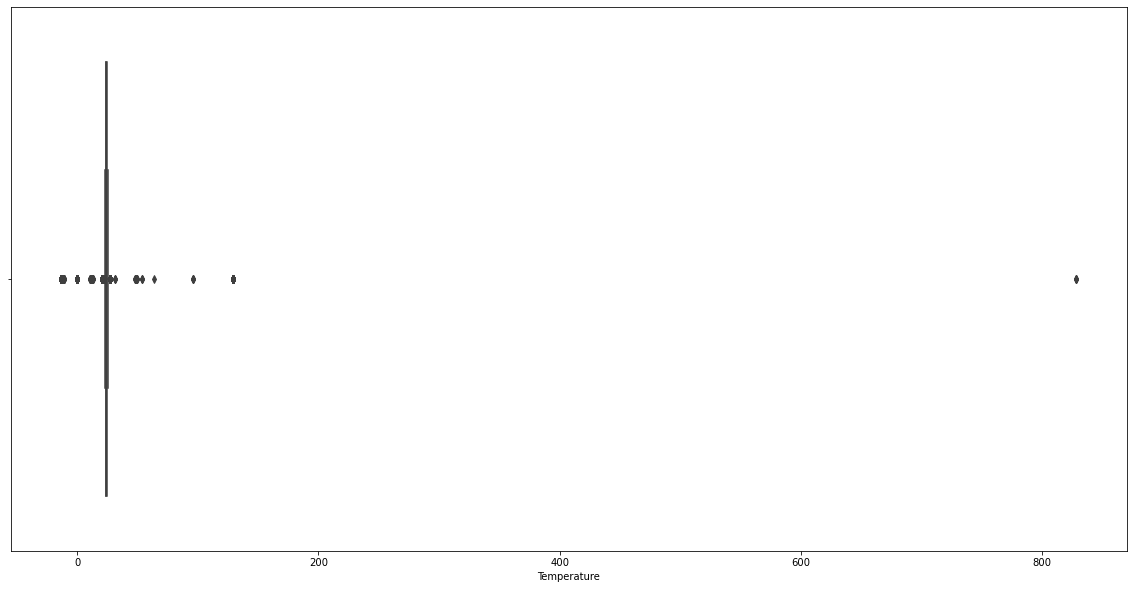

In [17]:
sns.boxplot(df2['Temperature'])

In [18]:
len(np.where((df2['Temperature']>60) | (df2['Temperature']<10))[0])

#We have set the range of temperature to be between 10-60 degree celcius

7818

In [19]:
df2=df2[(df2['Temperature']<60) & (df2['Temperature']>10)]
df2.max()

Current                       163
Humidity                      171
Temperature                    54
Flow                        14.47
Job Temp                   3276.7
Voltage                    24.499
Defect         Tungsten Inclusion
dtype: object

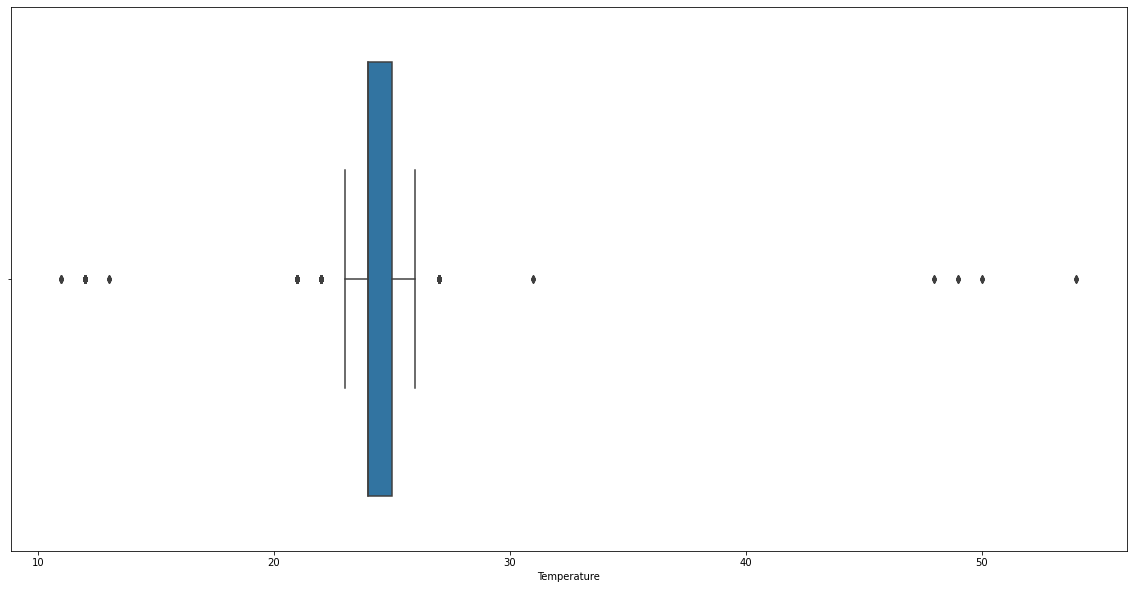

In [20]:
sns.boxplot(df2['Temperature'])

In [21]:
#We also see that relative humidity has values greater than 100 percent which is not realistic

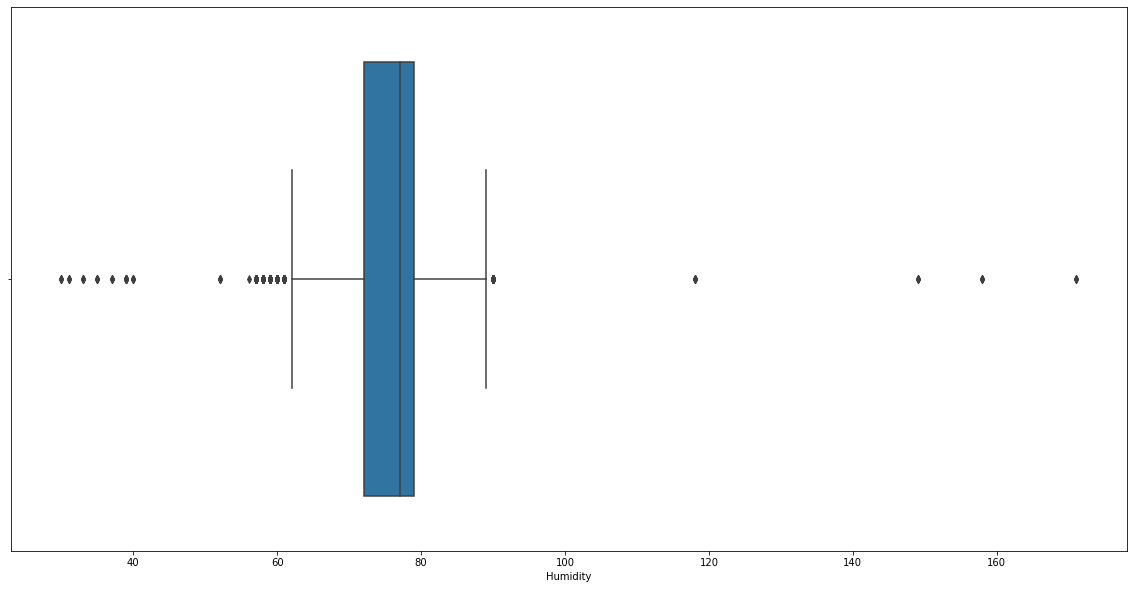

In [22]:
sns.boxplot(df2['Humidity'])

# OUTLIER DETECTION

In [23]:
#FUNCTION TO GET UPPER AND LOWER QUARTILE VALUES

def remove_outliers(df_r,upper=None,lower=None):
    if (upper==None and lower==None):
        Q1 = np.percentile(df_r, 25,
                   interpolation = 'midpoint')
        Q3 = np.percentile(df_r, 75,
                   interpolation = 'midpoint')
        
        IQR= Q3 - Q1
        
        upper = Q3 + 1.5*IQR

        lower = Q1 - 1.5*IQR
        
        print('Upper: ',upper)
        print('Lower: ',lower)
        
        return upper,lower
    else:
        print('Upper: ',upper)
        print('Lower: ',lower)
        return upper,lower

In [24]:
hum_upper,hum_lower=remove_outliers(df2['Humidity'])

Upper:  89.5
Lower:  61.5


In [25]:
len(np.where((df2['Humidity']>hum_upper) | (df2['Humidity']<hum_lower))[0])

#Removing Humdity values outside the inter-quartile range

16491

In [26]:
df2=df2[(df2['Humidity']<hum_upper) & (df2['Humidity']>hum_lower)]
df2.max()

Current                       163
Humidity                       89
Temperature                    31
Flow                        14.47
Job Temp                   3276.7
Voltage                    24.499
Defect         Tungsten Inclusion
dtype: object

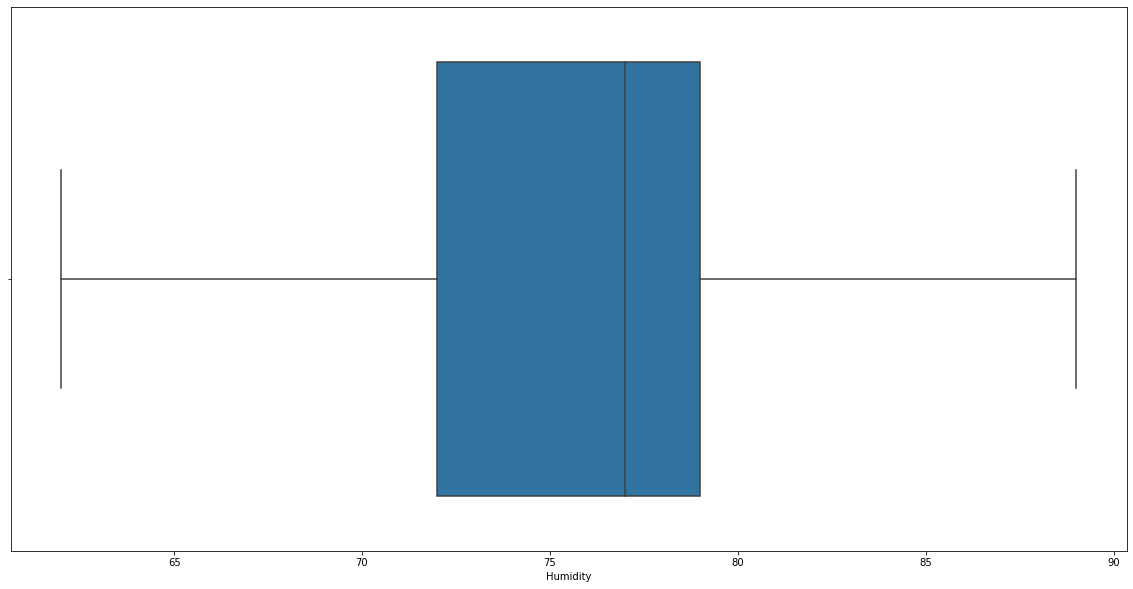

In [27]:
sns.boxplot(df2['Humidity'])

<h2>We are not removing outliers from other columns since there is no reasonable justification to suggest that those values are not observation values but misreadings.</h2>

In [29]:
df2.head()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
1,1.13,74.0,23.0,0.01,29.299999,15.2,No Defect
2,1.82,74.0,23.0,0.00,29.299999,0.0,Tungsten Inclusion
3,2.91,74.0,23.0,0.00,29.299999,0.0,No Defect
4,0.04,74.0,23.0,0.00,29.299999,0.0,No Defect
5,2.51,74.0,23.0,0.00,27.799999,0.0,No Defect


# Analysis(Detailed Report in the document)

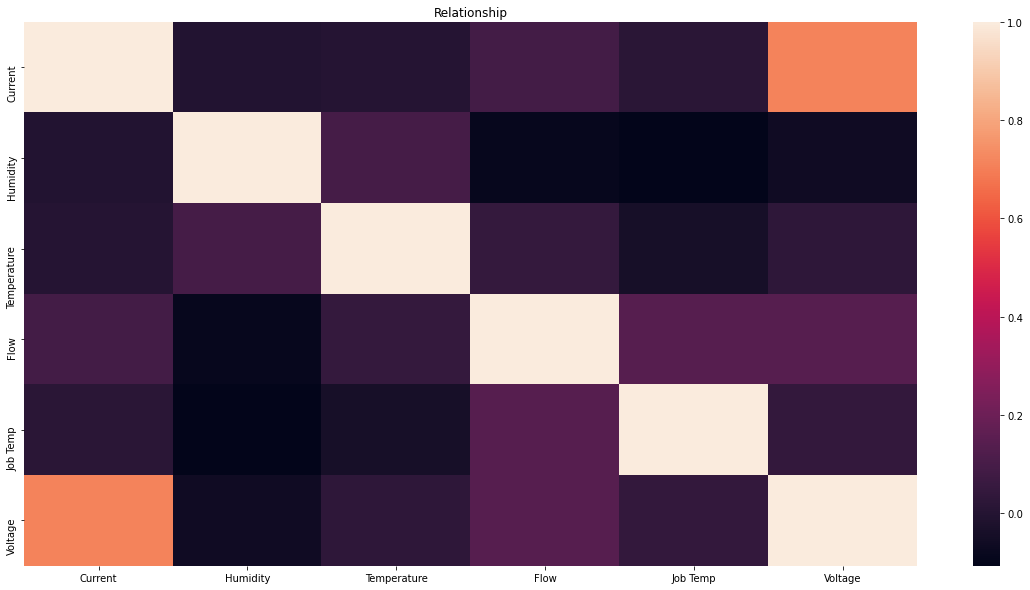

In [30]:
#CORRELATION BETWEEN THE PARAMETERS

sns.heatmap(df2.iloc[:,:-1].corr())  
plt.title('Relationship')
plt.show()

In [85]:
df2.groupby(by=['Defect']).agg({'Temperature':['mean','max'],'Humidity':['mean','max'],'Current':['max','mean'],'Flow':['max','mean'],'Job Temp':['max','mean'],'Voltage':['max','mean']})

Temperature         Humidity           Current             \
                          mean   max       mean   max         max       mean   
Defect                                                                         
No Defect            24.084240  31.0  75.898972  89.0  163.000000   8.573442   
Porosity             24.120581  27.0  75.769722  89.0   66.629997   7.651750   
Tungsten Inclusion   24.061771  27.0  75.115990  89.0  142.710007  24.181408   

                     Flow               Job Temp                Voltage  \
                      max      mean          max        mean        max   
Defect                                                                    
No Defect           14.47  1.784206  3276.699951  135.241211  24.499001   
Porosity            11.66  1.855458  3276.699951  166.881866  16.742001   
Tungsten Inclusion  11.31  1.841906  3276.699951  269.916626  24.084999   

                              
                        mean  
Defect                        
No Defect           2.789488  
Porosity            2.555460  
Tungsten Inclusion  7.385740

# Random undersampling and SMOTE oversampling

We observe that the data is highly imbalanced. This means that the data has unequal representation of each categories. 

To treat this, we will be using the method of randomly undersampling of the majority class and oversampling using SMOTE algorithm for the minority classes.

In [32]:
df2['Defect'].value_counts()   #Highly imbalanced

No Defect             797748
Tungsten Inclusion      4371
Porosity                1103
Name: Defect, dtype: int64

In [86]:
df2[df2['Defect']=='No Defect'].sample(10)   

#This way we can take random samples from the majority class

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
91207,2.210000,79.0,24.0,0.83,40.900002,0.000,No Defect
330422,0.970000,79.0,22.0,2.15,31.200001,0.000,No Defect
562446,40.369999,72.0,24.0,3.08,29.700001,9.082,No Defect
808994,1.780000,76.0,24.0,2.03,28.299999,0.000,No Defect
289811,21.260000,70.0,24.0,2.32,31.200001,9.211,No Defect
722855,1.690000,71.0,24.0,2.31,29.000000,9.707,No Defect
606988,-0.150000,77.0,24.0,0.00,30.100000,0.000,No Defect
738537,2.970000,63.0,24.0,3.98,31.299999,0.000,No Defect
811649,-1.110000,73.0,24.0,0.03,29.400000,0.000,No Defect
738671,1.300000,63.0,24.0,3.93,35.200001,0.000,No Defect


In [34]:
df_tungsten=df2[df2['Defect']=='Tungsten Inclusion']
df_porosity=df2[df2['Defect']=='Porosity']

#creating a copy of values according to their type of defect

In [35]:
df_tungsten.shape

(4371, 7)

In [36]:
df_porosity.shape

(1103, 7)

In [37]:
temp=pd.DataFrame()
for i in range(5):
     temp=pd.concat([temp,pd.concat([df_tungsten,df_porosity,df_porosity,df_porosity,df_porosity,])])
        
#Duplicating values from the minority class to increase representation^

In [38]:
temp['Defect'].value_counts()   

Porosity              22060
Tungsten Inclusion    21855
Name: Defect, dtype: int64

In [39]:
df3=pd.DataFrame()

In [40]:
df3=pd.concat([df2[df2['Defect']=='No Defect'].sample(200000),temp])

In [41]:
df3['Defect'].value_counts()

No Defect             200000
Porosity               22060
Tungsten Inclusion     21855
Name: Defect, dtype: int64

Now we have randomly undersampled the majority and also duplicated the minority class we will further populate the minority class by using the SMOTE algorithm.

SMOTE Algorithm

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
smote=SMOTE(sampling_strategy='not majority')

In [47]:
df_x=df3.iloc[:,:-1]

In [48]:
df_y=df3['Defect']

In [49]:
X_sm,Y_sm=smote.fit_resample(df_x,df_y)

In [50]:
Y_sm.value_counts()

Tungsten Inclusion    200000
Porosity              200000
No Defect             200000
Name: Defect, dtype: int64

<h4>Successfully populated the minority classes using SMOTE</h4>

In [52]:
Y_sm

0                  No Defect
1                  No Defect
2                  No Defect
3                  No Defect
4                  No Defect
                 ...        
599995    Tungsten Inclusion
599996    Tungsten Inclusion
599997    Tungsten Inclusion
599998    Tungsten Inclusion
599999    Tungsten Inclusion
Name: Defect, Length: 600000, dtype: object

# Standard Scaler and Label Encoding

STANDARD SCALER

In [53]:
# import module for standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
model = scaler.fit(X_sm)

In [55]:
Xs=model.transform(X_sm)

In [56]:
Xs.shape

(600000, 6)

In [57]:
#Standard Scaler converts the dataframe into numpy array

NOTE: Standard Scaler is not required for tree-based ensemble models like XGBoost, Adaboost, Random Forest Classifier. However, they are important for SVM classifiers.

LABEL ENCODING

In [58]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [59]:
Y_sm= label_encoder.fit_transform(Y_sm)

In [60]:
Y_sm

array([0, 0, 0, ..., 2, 2, 2])

We can compare and confirm that:

0 is 'No Defect'

1 is 'Porosity'

2 is 'Tungsten Inclusion'

In [61]:
Y_sm.shape

(600000,)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(X_sm,Y_sm,test_size=0.2)

# XGBoost Model

In [64]:
import xgboost as xgb

In [69]:
XGB = xgb.XGBClassifier(num_parallel_tree=10,n_estimators=200)

In [70]:
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=10, objective='multi:softprob',
              predictor='auto', ...)

In [71]:
y_pred=XGB.predict(x_test)

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     40110
           1       0.92      1.00      0.96     39858
           2       0.92      0.97      0.95     40032

    accuracy                           0.94    120000
   macro avg       0.94      0.94      0.93    120000
weighted avg       0.94      0.94      0.93    120000



# We even used other ML models. Below are some results for reference.

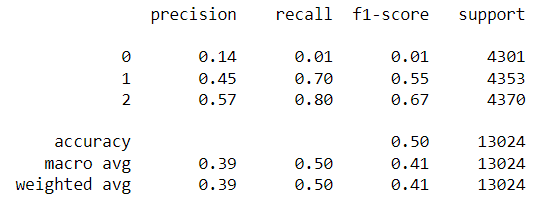

<center><h2>Support Vector Machines</h2></center>

<hr>

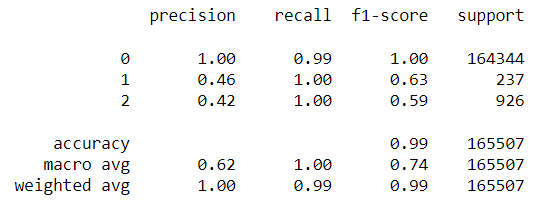
<center><h2>Random Forest Classifier</h2></center>

<hr>

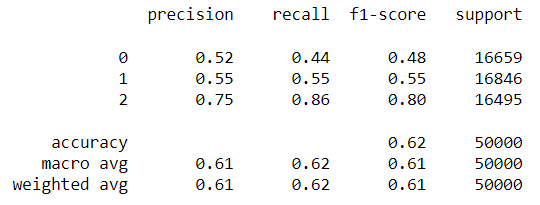
<center><h2>Adaboost Classifier</h2></center>

# We trained multiple models and checked their accuracy along with F1 score to come to the conclusion that XGBoost gives the best accuracy and F1 Score

SAVING THE MODEL

In [81]:
import pickle

In [82]:
# you can save the model to a file
with open('welding.pkl', 'wb') as f:
    pickle.dump(XGB, f)

In [84]:
# Run the below code to load your model
with open('welding.pkl', 'rb') as f:
    clf = pickle.load(f)

<hr>

# Return on Investment (ROI)

From an investors point of view, profit matters the most. Hence, formulating profit per prediction by considering the testing accuracy, the cost incurred by a false prediction and expected profit. 

Z_hat = [ P - ( 1 - A ) * e ]

where, 

Z_hat = Profit per prediction

P = Expected profit 
     
A = Accuracy of the model

e = Cost incurred for every false prediction

(1 - A) gives us the loss generated by our model. 

Multiplying it with the cost incurred for a false prediction will give us the cost incurred because of the loss of the model.

Subtracting it from the profit that can be generated from the product will give us the general profit per prediction on using the model.


For our model, we have found the accuracy to be .94 which can be put in place of A. 

<h4>Estimate</h4>

Let,

P = 100 units

A = .94 (from the model)

e = 150 units (cost incurred by faulty welding)

Therefore,

Z_hat = 91

This means that we can save about 91 units by using the model

<hr>

# Total Cost of Ownership

Our model can easily be deployed on cloud and can be accessed anywhere. The best cloud service provider in the industry is Amazon Web Services(AWS) and we will consider all our calculations with respect to the same.

We can estimate the cost of operation of our model by using the tool provided by AWS over here: https://calculator.aws/#

1. We have selected the area to be Asia Pacific(Mumbai)

2. We have limited the workload to the working days of the week (Monday - Friday). The initial assumption is that there will be a maximum of 8 instances will be running at the peak of workload

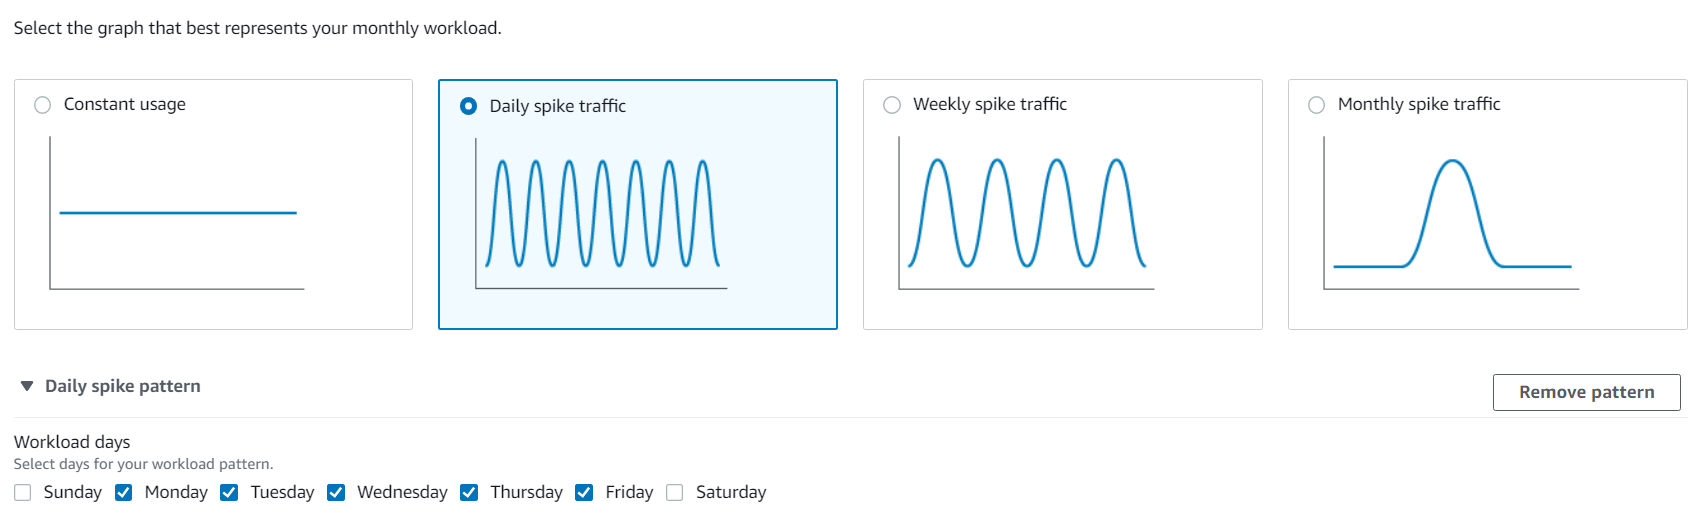




3. We consider 2 vCPUs and 4GB RAM to be enough to carry out computations for predictions using our models. The below image shows the model we are considering.

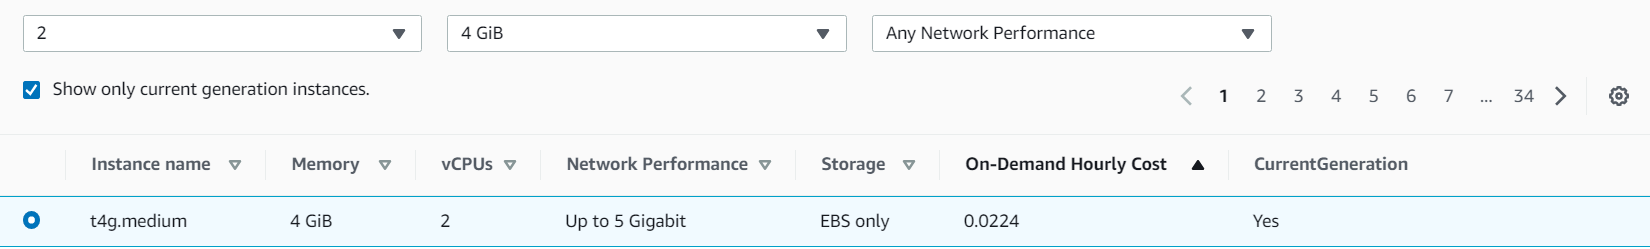



Below is the complete calculation for the monthly cost of using an EC2 service
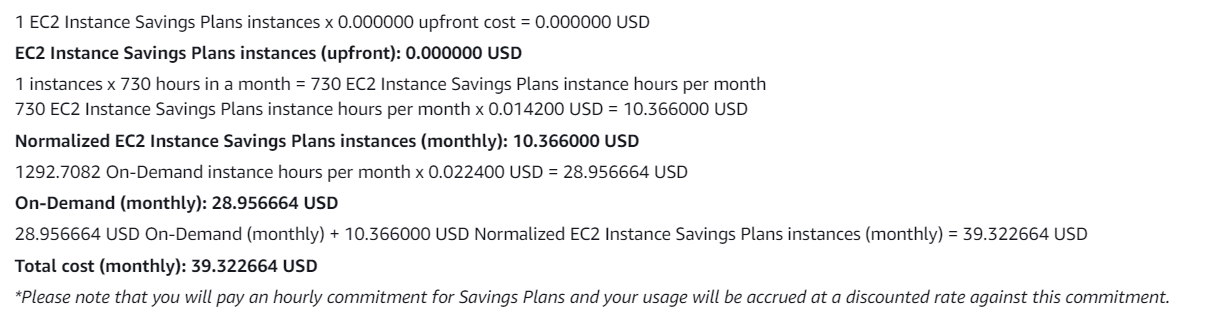



4. Apart from this, we can also add persistent storage to keep track of the model activity and the entire production. AWS provides Elastic Block Storage(EBS) to keep a track of it. These are the parameters we have chosen.
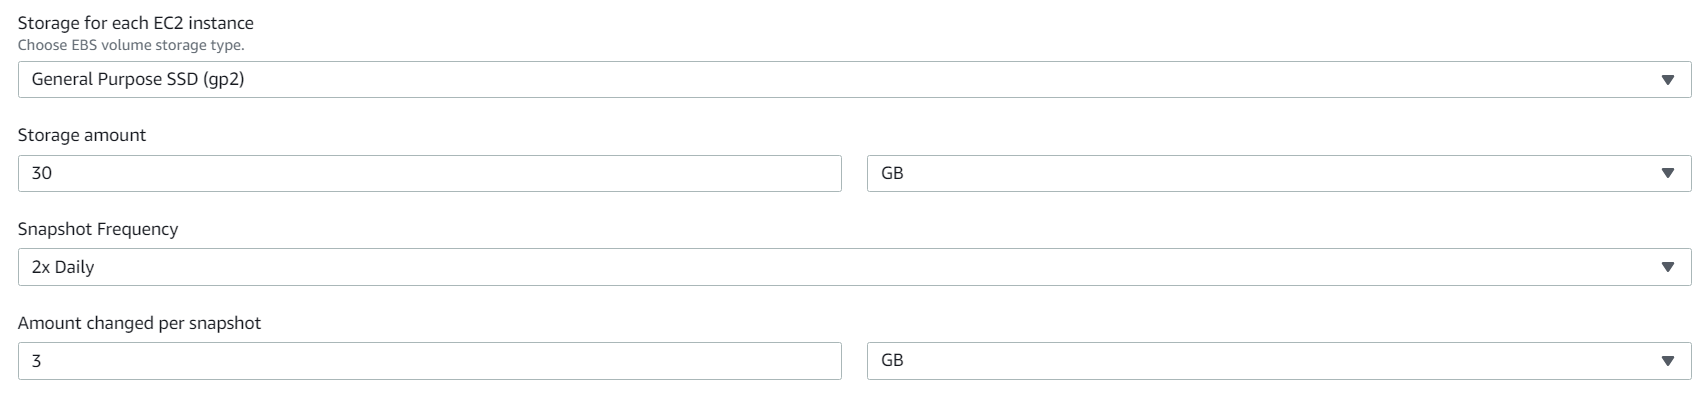

The monthly calculation for EBS is given below
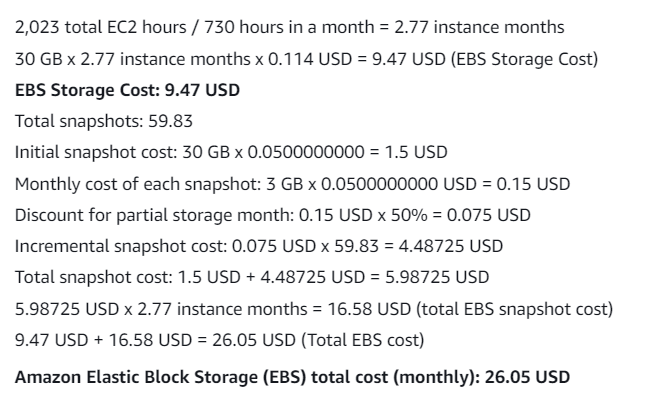

The Total Cost of Ownership according to our estimation would be 

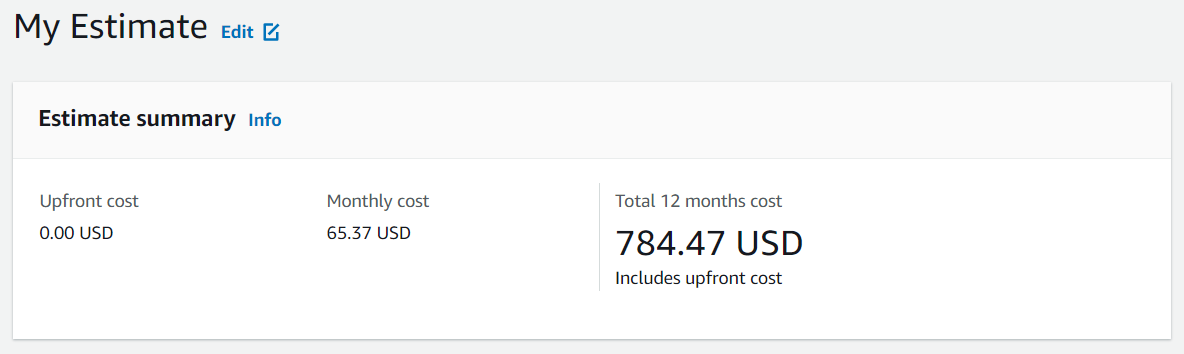

# Conclusion

1.We have undersampled the majority class and oversampled the minority class using the SMOTE Algorithm for balanacing the input data.

2.We implemented the XGBClassifier Model for prediction with a weighted accuracy of 94%.

3.The approximate annual Total Cost of Ownership is $784.47 based on considering the suitable technical requirements mentioned above.

4.The Return on Investment is formulated above and approximated on the basis of assumptions, we observe that 91 units can be saved per predication(Profit Per Prediction).